# Lending club case study

### For whom the data is considered:
There is **consumer finance company** which specialises in lending various types of loans to urban customers.

### What is the data all about:
Historical data set of loan applicants and whether they ‘defaulted’ or not.

### Goal of analysis:
The goal is to **recognize patterns** that **suggest** whether a person is **likely to default or not**. This information can be used to take actions such as denying the loan, reducing the loan amount, or offering loans to risky applicants at a higher interest rate.
<br/><br/>

In [1]:
# Importing all required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# To keep notebook clean from unwanted warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset
loan_df = pd.read_csv("loan.csv")

In [4]:
# Finding dataset dimensions/shape
loan_df.shape

(39717, 111)

We can see that this is a huge dataset with `39717` rows and `111` columns

Let we have a preview of data

In [5]:
# Previewing data
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


We can see that there are many columns with `NaN` and '0.0' values in all previewed rows.

So let we check if these columns have null values overall or for few rows

In [6]:
# Countig all null values in each column
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### Removing column with only null values
We can see that few columns have all values as null/NaN. Let we remove those columns as these will have no impat on analysis

In [7]:
# Dropping columns with all null values
loan_df.dropna(axis = 1, how = 'all', inplace = True)

In [8]:
# Finding new shape of updated dataset
loan_df.shape

(39717, 57)

So, there were **54** columns with all null values, which we have removed.

Let we also check the data with how many unique values each column have

In [9]:
# Counting unique values in all columns
loan_df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26526
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

#### Removing column with only 1 value
We can observe that there are few columns with only 1 value. We can remove these columns as well as these will not contribute in the analysis as well

In [10]:
cols_with_single_value = ['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
print("Total columns with single values", len(cols_with_single_value))

Total columns with single values 9


In [11]:
# Dropping the columns with single values
loan_df.drop(cols_with_single_value, axis = 1, inplace = True)

In [12]:
# Previewing updated dataset
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


#### Analysis of a suspected column
We can see a column named `pub_rec_bankruptcies` is having only 3 unique values. Let we analyse if this column is required or not. This column denotes **Number of public record bankruptcies**. By the column description, it is a decision post loan lending. We can remove it, still let we analyse

In [13]:
loan_df["pub_rec_bankruptcies"].describe()

count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

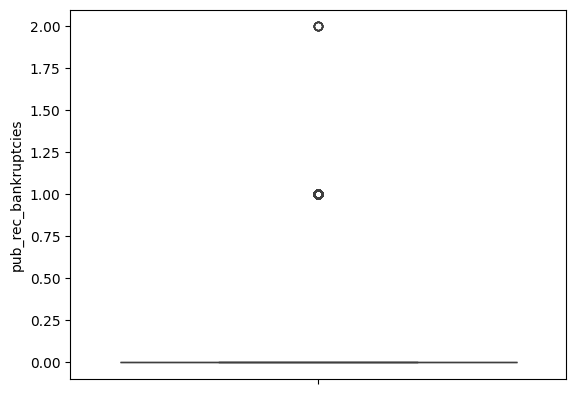

In [14]:
# Checking the outliers of pub_rec_bankruptcies column
sns.boxplot(loan_df["pub_rec_bankruptcies"])
plt.show()

We can see that the column having only values **[0, 1, 2]** and it's contribution to the analysis will be low. So, let we remove this as well

In [15]:
loan_df.drop("pub_rec_bankruptcies", axis = 1, inplace = True)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16


### Removal of other post-lending columns
We just removed one of the post-lending or post-approval column. We can go through data dictionary to find other such columns as well

#### List of post-lending/approval columns is as follows
1. collection_recovery_fee
2. delinq_2yrs
3. last_pymnt_amnt
4. last_pymnt_d
5. mths_since_last_delinq
6. mths_since_last_record
7. next_pymnt_d
8. out_prncp
9. recoveries
10. revol_bal
11. total_pymnt
12. total_rec_prncp
13. total_rec_int
14. total_rec_late_fee

Let we drop these as well, as these are of no use in pre-approval analysis

In [16]:
post_approval_cols = ["collection_recovery_fee", "delinq_2yrs", "last_pymnt_amnt", "last_pymnt_d", "mths_since_last_delinq", "mths_since_last_record", "next_pymnt_d", "out_prncp", "recoveries", "revol_bal", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee"]
# Dropping the post-approval columns
loan_df.drop(post_approval_cols, axis = 1, inplace = True)

### Removal of metadata columns
We can also observe that there are few columns which denotes metadata for the records

#### List of metadata columns is as follows
1. `id`: It's an ID column
2. `member_id`: It's an ID column
3. `url`: URL of the LC, a metadata. It can not contribute in pre-approval analysis
4. `title`: Metadata column
5. `emp_title`: Metadata column
6. `zip_code`: We can find the density of defaulters in certain region by this, but it'll be an injustice to new lenders from these areas if we include this column. 
7. `last_credit_pull_d`: Irrelevant for analysis
8. `addr_state`: Descriptive text data, irrelevant for analysis
9. `desc`: Textual data, which we can't analyse, so we can remove this as well
10. `out_prncp_inv`: Metadata column
11. `total_pymnt_inv`: Metadata column
12. `funded_amnt`: We also have columns which denotes kind of same thing based on data dictionary, `funded_amnt` and `funded_amnt_inv`. Let we choose either of them

These columns doesn't contribute in the pre-approval analysis, so we can drop these as well

In [17]:
metadata_cols = ["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state", "desc", "out_prncp_inv", "total_pymnt_inv", "funded_amnt"]
# Dropping the metadata columns
loan_df.drop(metadata_cols, axis = 1, inplace = True)

In [18]:
loan_df.shape

(39717, 21)

In [19]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.90%,38


### Checking missing values in the extracted dataset

In [20]:
(loan_df.isna().mean())*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.706650
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.125891
total_acc              0.000000
dtype: float64

### Handling missig values

We have columns with missing values
- emp_length
- revol_util

Let we start with handling missing values of column `emp_length`

In [21]:
loan_df.emp_length.describe()

count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object

In [22]:
# As emp_length have only 11 unique values, let we count these values
loan_df.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

#### Filling null values in `emp_length`
We can see  that 10+ years is the most used value and it's frequency is much higher than the second most. So let's use this value to fill the null values, because there are very few null values compare to the mod value

In [23]:
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0], inplace = True)

# Now checking ones more if null values are handled
loan_df.emp_length.isna().sum()

0

Let we start with handling missing values of column revol_util

In [24]:
loan_df.revol_util.describe()

count     39667
unique     1089
top          0%
freq        977
Name: revol_util, dtype: object

In [25]:
# Counting null values
loan_df.revol_util.isna().sum()

50

### Handling null values in revol_util
We can see that number of rows in revol_util are just 50 compare to >39K rows. We can remove these rows as such a small number of data won't affect the result

In [26]:
loan_df.dropna(axis = 0, subset = ['revol_util'] , inplace = True)

# Now checking ones more if null values are handled
loan_df.revol_util.isna().sum()

0

In [27]:
loan_df.to_csv('new_loan.csv')